In [ ]:
%pip install pandas matplotlib seaborn pillow

In [76]:
import pandas as pd

url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
df = pd.read_csv(url)

#Calculate Total as the sum of death over all the days
df["Total"] = df[df.columns[-1]]

#df = df[(df["Country/Region"]=="France")]

df = df[["Country/Region","Total","Long","Lat"]].groupby("Country/Region",as_index=False).aggregate({'Total': 'sum','Long':'last','Lat':'last'})

#df = df.loc[131]

# Show Total for the first 5 countries
df[["Country/Region","Total"]].sort_values("Total",ascending=False).head(10)


,Country/Region,Total
186,US,1063310
24,Brazil,686963
80,India,528835
147,Russia,380556
117,Mexico,330233
141,Peru,216819
190,United Kingdom,208258
86,Italy,177650
81,Indonesia,158235
63,France,156660


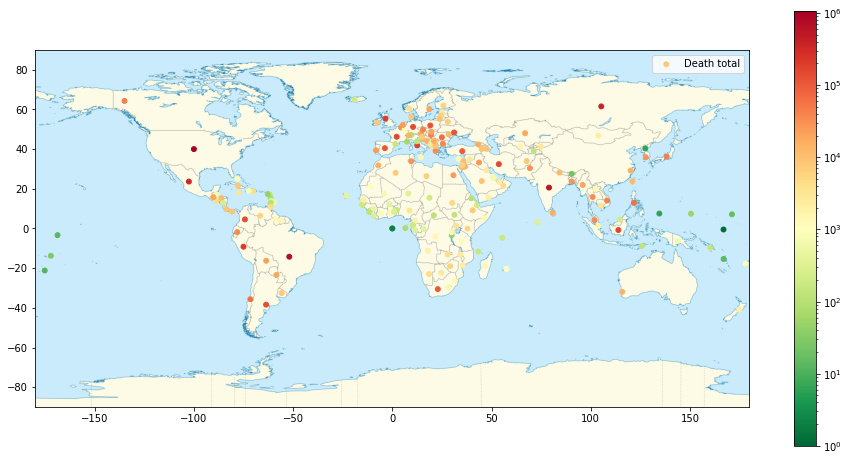

In [11]:
url_image = "https://upload.wikimedia.org/wikipedia/commons/7/74/Mercator-projection.jpg"
url_image = "https://upload.wikimedia.org/wikipedia/commons/7/7f/World_Map_flat_Mercator.png"
#url_image = 'https://upload.wikimedia.org/wikipedia/commons/8/83/Equirectangular_projection_SW.jpg'
#url_image = 'https://upload.wikimedia.org/wikipedia/commons/thumb/2/23/Blue_Marble_2002.png/3840px-Blue_Marble_2002.png'
url_image = 'https://upload.wikimedia.org/wikipedia/commons/thumb/b/b0/World_location_map_%28equirectangular_180%29.svg/2521px-World_location_map_%28equirectangular_180%29.svg.png'

import matplotlib
import matplotlib.pyplot as plt

import requests
from PIL import Image
from io import BytesIO

r = requests.get(url_image, headers={'User-agent': 'Mozilla/5.0'})
if r.status_code == 200:
    img = Image.open(BytesIO(r.content))
    
    fig, ax = plt.subplots(figsize=(16,8))
    sc = ax.scatter(df["Long"],df["Lat"],s=24,c=df["Total"],marker="o", cmap="RdYlGn_r",norm=matplotlib.colors.LogNorm(),label='Death total')  # plot a blue dot there
    plt.legend()
    plt.colorbar(sc)
    ax.imshow(img,extent=[-180, 180, -90, 90])
    
    plt.show()

In [ ]:
%pip install basemap

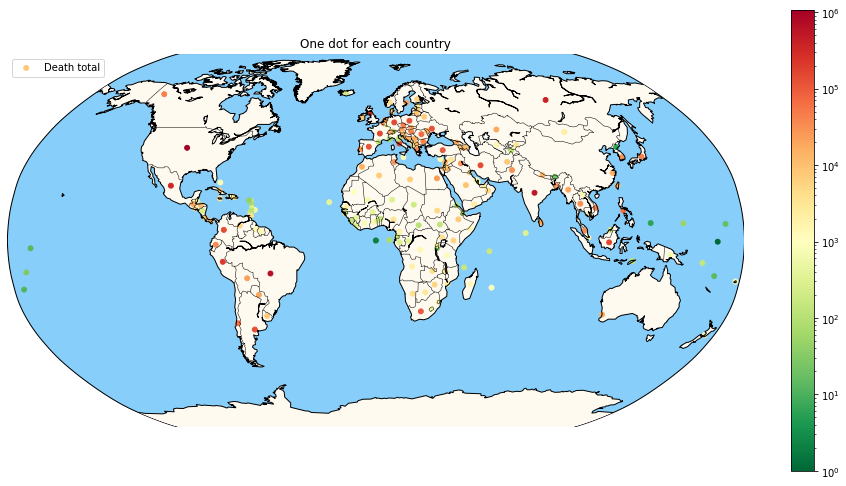

In [17]:
import numpy as np
from mpl_toolkits.basemap import Basemap

#USING BASEMAP TO PLOT DATA :
# https://basemaptutorial.readthedocs.io/en/latest/first_map.html
# https://matplotlib.org/basemap/users/examples.html
# create new figure, axes instances.
fig=plt.figure(figsize=(16,8))
ax=fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(projection='cyl')
# setup mercator map projection.
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
m = Basemap(projection='robin',lon_0=0,resolution='c')

# draw base map
m.drawmapboundary(zorder=-1,fill_color='lightskyblue')
m.drawcoastlines()
m.fillcontinents(zorder=0,color='floralwhite')
m.drawcountries()
#m.drawparallels(np.arange(10,90,20),labels=[1,1,0,1])
#m.drawmeridians(np.arange(-180,180,30),labels=[1,1,0,1])

# draw data on top
lons = df["Long"]
lats = df["Lat"]
color = df["Total"]

# Convert the lat, lon to local projection
xpt, ypt = m(lons,lats)
#lonpt, latpt = m(x,y,inverse=True) # Fonction inverse

m.scatter(xpt,ypt,s=24,c=color,marker="o", cmap="RdYlGn_r",norm=matplotlib.colors.LogNorm(),label='Death total')

#Choosing the colormap : https://matplotlib.org/stable/tutorials/colors/colormaps.html

ax.set_title('One dot for each country')
plt.legend()
plt.colorbar()

plt.show()

Aller plus loin sur la représentation  : https://ramiro.org/notebook/basemap-choropleth/

Ma'tan al-Sarra
Switzerland
Jersey
Austria
Portugal
Luxembourg
Kazakhstan
Aruba
Holy See
Equatorial Guinea
Equatorial Guinea
Jamaica
Estonia
Estonia
Estonia
Estonia
Estonia
Niger
Belize
Belize
Belize
Morocco
Northern Mariana Islands
Northern Mariana Islands
Kuril Islands
Kuril Islands
Kuril Islands
France
France
France
France
France
France
Serbia
Uruguay
Guam
Panama
Panama
Panama
Panama
Netherlands Antilles
Netherlands Antilles
Algeria
Togo
Malta
Finland
Finland
Finland
Finland
Finland
Finland
Finland
Finland
Finland
Finland
Finland
Finland
Finland
Turkey
Turkey
Turkey
Turkey
Lithuania
Lithuania
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federation
Russian Federatio

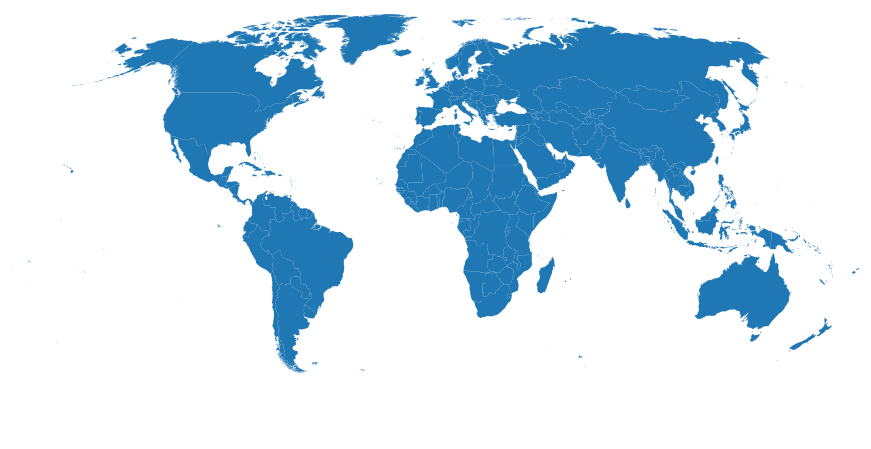

In [91]:
import math
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()
#fig.suptitle('Forest area as percentage of land area in {}'.format(year), fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(color='w')

shapefile='world-administrative-boundaries'

m.readshapefile(shapefile,name='boundaries', color='#44444400', linewidth=.2)
patches=[]
for info, shape in zip(m.boundaries_info, m.boundaries):
    print(info['name'])
    patches.append(Polygon(np.array(shape), closed=True))
pc = PatchCollection(patches)
ax.add_collection(pc)
plt.show()

C:\Users\agademer\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10



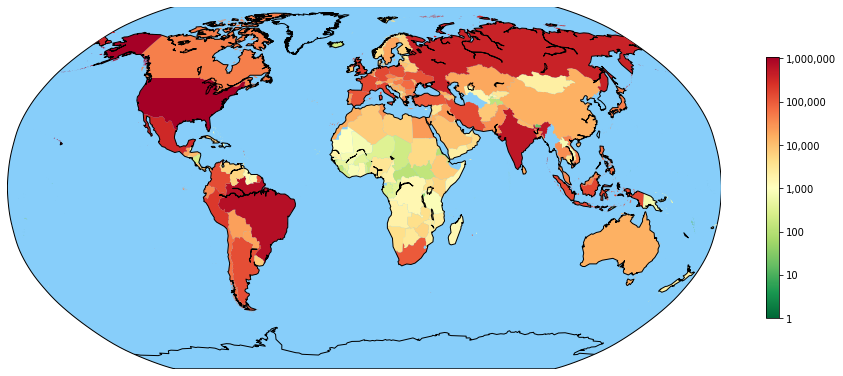

In [137]:
"""Inspiration
https://ramiro.org/notebook/basemap-choropleth/
https://www.net-analysis.com/blog/Choropleth.html
"""

import math
from matplotlib.collections import PatchCollection
from matplotlib.patches import Polygon

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot()
#fig.suptitle('Forest area as percentage of land area in {}'.format(year), fontsize=30, y=.95)

m = Basemap(lon_0=0, projection='robin')
m.drawmapboundary(zorder=-1,fill_color='lightskyblue')
m.drawcoastlines()
#m.fillcontinents(zorder=0,color='floralwhite')
#m.drawcountries()

df["Log"] = np.log10(df["Total"])

df = df.replace("US","United States of America")
df = df.replace("South Sudan", "S. Sudan")
df = df.replace("Central African Republic", "Central African Rep.")
df = df.replace("Congo (Brazzaville)","Congo")
df = df.replace("Congo (Kinshasa)","Dem. Rep. Congo")
df = df.replace("Cote d'Ivoire","Côte d'Ivoire")
df = df.replace("Bosnia and Herzegovina","Bosnia and Herz.")

#Shapefile from http://www.naturalearthdata.com/downloads/10m-cultural-vectors/
shapefile='ne_10m_admin_0_countries/ne_10m_admin_0_countries'

m.readshapefile(shapefile,name='boundaries', color='#44444400', linewidth=.2)
dic_shape={}
patches=[]
values=[]
not_found=[]
# Creating a dictionary of shapes (Some countries are composed of several shape)
for info, shape in zip(m.boundaries_info, m.boundaries):
    if info['NAME'] not in dic_shape:
        dic_shape[info['NAME']] = []
    dic_shape[info['NAME']].append(shape)

# Iter on the data, adding the encountered country shapes
for idx, row in df.iterrows():
    country_name = row["Country/Region"]
    if country_name in dic_shape:
        for shape in dic_shape[country_name]:
            patches.append(Polygon(np.array(shape), closed=True))
            #try:
            #        value = math.log10(row["Total"])
            #except:
            #        value = 0
            values.append(row["Log"])
    else:
        not_found.append(country_name)
pc = PatchCollection(patches,cmap='RdYlGn_r')
pc.set_array(values)
ax.add_collection(pc)

'''
The main detail with the color bar is that we have used log base 10 of the real number we are using as a color code.
So we manually set the color bar ticks, and manually set the labels at each tick (with some pleasing commas to 
separate the thousands). My mental model is that the color bar creation makes a new Axes object, and we can 
set the x-axis and y-axis of this Axes object independently of the main plot (rather than changing some attributes 
of the color bar).
'''
cb = fig.colorbar(pc, ax=ax, shrink=0.6, ticks = range(0,7))
tick_labels = ["{:,}".format(10**i) for i in range(0,7)]
cb.ax.set_yticklabels(tick_labels) 
cb.ax.set_xlabel('Death Total by Country', size = 8)

plt.show()

https://towardsdatascience.com/best-libraries-for-geospatial-data-visualisation-in-python-d23834173b35

In [ ]:
%pip install plotly

In [142]:
import plotly.express as px

df["Log"] = np.log10(df["Total"])

fig = px.choropleth(df, locations="Country/Region",locationmode='country names',
                    color="Log", 
                    hover_data={"Total":True,"Log":False},
                    hover_name="Country/Region", # column to add to hover information
                    color_continuous_scale=px.colors.diverging.RdYlGn_r,
                    projection='natural earth')


tick_vals=list(range(7))
tick_labels = ["{:,}".format(10**i) for i in tick_vals]
fig.update_layout(coloraxis_colorbar=dict(
    title="Death Total by Country",
    tickvals=tick_vals,
    ticktext=tick_labels
))
              
fig.show()

C:\Users\agademer\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:397: RuntimeWarning:

divide by zero encountered in log10

